### Librerías

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD

In [11]:
tf.config.set_visible_devices([], 'GPU')

# if tf.test.gpu_device_name(): # this lies and tells you about all devices
if tf.config.experimental.list_logical_devices('GPU'):
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Constantes

In [12]:
PATH = "../../"

In [13]:
MODEL_NAME = "MobileNetV2"

In [14]:
TARGET_IMG_WIDTH = 224
TARGET_IMG_HEIGHT = 224
TARGET_IMG_CHANNELS = 3
TARGET_SIZE = (TARGET_IMG_WIDTH, TARGET_IMG_HEIGHT)
TARGET_SHAPE = (TARGET_IMG_WIDTH, TARGET_IMG_HEIGHT, TARGET_IMG_CHANNELS)

OPTIMIZER = Adam()
LOSS = tf.keras.losses.SparseCategoricalCrossentropy()

# METRICS = [tf.keras.metrics.Accuracy, tf.keras.metrics.Precision, tf.keras.metrics.Recall]
METRICS = ['accuracy']
# METRICS = ['accuracy', 'loss', 'precision', 'recall', 'f1_score', 'auc_roc', 'sensitivity', 'specificity', 'top_k_accuracy']

In [15]:
CLASSES = ["caballo", "ciervo", "gamo", "humano", "jabali", "vaca", "vacia", "zorro"]

### Modelo

In [88]:
# Cargar el modelo entrenado
best_model_path = PATH + "Models/" + MODEL_NAME + "/best_model_20230703_1624_val_acc_0.5863.h5"
best_model = load_model(best_model_path)

### Funciones

In [89]:
# Función para preprocesar la imagen
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, TARGET_SIZE)
    image = image.astype("float32") / 255.0
    return image

def predict_image(imagen, model):

    # Preprocesar la imagen
    imagen_preprocesada = preprocess_image(imagen)

    # Realizar la predicción
    prediccion = model.predict(np.expand_dims(imagen_preprocesada, axis=0), verbose=0)
    clase_predicha = np.argmax(prediccion)
    accuracy_prediccion = prediccion[0, clase_predicha]

    return prediccion, clase_predicha, accuracy_prediccion

# Función para mostrar un gráfico con imágenes aleatorias y sus predicciones
def plot_image(image_path, model):
    # Cargar la imagen
    imagen = cv2.imread(image_path)

    prediccion, predicted_label, accuracy = predict_image(imagen, model)

    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Configurar el gráfico
    plt.figure(figsize=(6, 6))
    plt.imshow(imagen)
    plt.axis("off")

    # Mostrar la información de la predicción
    plt.title(f"Predicted: {CLASSES[predicted_label]}\nAccuracy: {accuracy:.4f}", fontsize = 8)
    #text = f"Predicted: {predicted_label}\nAccuracy: {accuracy:.2f}"
    #plt.text(10, 10, text, color="black", fontsize=8, backgroundcolor="white")
    plt.show()


In [102]:
# Directorio de la imagen de entrada

# test
directorio_imagen = PATH + "Dataset/rev20/10/10_20220702 (6358).JPG" #vacia
directorio_imagen = PATH + "Dataset/rev21/2/2_20220806 (6611).JPG" #,caballo
directorio_imagen = PATH + "Dataset/rev20/17/17_20220604 (17836).JPG" #,gamo
directorio_imagen = PATH + "Dataset/rev15/10/10_20211217 (181).JPG" #,ciervo
directorio_imagen = PATH + "Dataset/rev16/21_16/21_20220125 (3946).JPG" #,jabali

# val
#directorio_imagen = PATH + "Dataset/rev22/9/9_20221006 (1503).JPG" #,gamo
#directorio_imagen = PATH + "Dataset/rev20/60/60_20220722 (1642).JPG" #,humano

'''directorio_csv = PATH + "CSVs/dataset/test.csv"

# Cargar el CSV en un DataFrame de pandas
df = pd.read_csv(directorio_csv)

indice = 377

imagen_info = df.iloc[indice]

# Obtener la ruta de la imagen y cargarla
directorio_imagen = PATH + "Dataset/" + imagen_info["path"]
label_imagen = imagen_info["class"]
'''


'directorio_csv = PATH + "CSVs/dataset/test.csv"\n\n# Cargar el CSV en un DataFrame de pandas\ndf = pd.read_csv(directorio_csv)\n\nindice = 377\n\nimagen_info = df.iloc[indice]\n\n# Obtener la ruta de la imagen y cargarla\ndirectorio_imagen = PATH + "Dataset/" + imagen_info["path"]\nlabel_imagen = imagen_info["class"]\n'

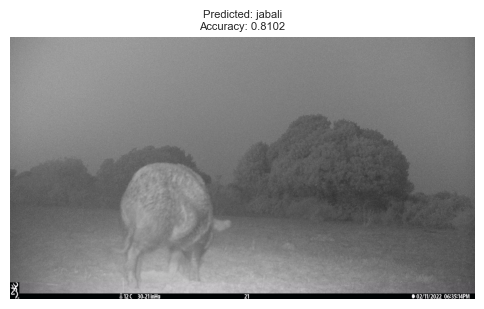

In [103]:
plot_image(directorio_imagen, best_model)